In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from sklearn.decomposition import PCA

In [42]:
df = pd.read_csv('../datasets/merged_per_year/merged_2005-06')
print df.info()
print df.shape
print "\n======"
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Columns: 101 entries, Unnamed: 0 to PIE
dtypes: float64(87), int64(12), object(2)
memory usage: 361.5+ KB
None
(458, 101)



,Unnamed: 0,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,NET_RATING,USG_PCT,TS_PCT,B2B_COUNT,3GMS_IN_4DAYS,4GMS_IN_5DAYS,PACE,PIE
0,0,243,Aaron McKie,1610612747,LAL,33.0,14,9,5,0.643,...,77,209,-6.2,0.060,0.272,19,29,3,91.20,0.068
1,1,101223,Aaron Miles,1610612744,GSW,23.0,19,13,6,0.684,...,73,190,-3.9,0.113,0.405,20,30,4,96.64,0.064
2,2,1425,Aaron Williams,1610612740,NOK,34.0,48,21,27,0.438,...,81,235,-3.2,0.138,0.551,19,26,4,90.89,0.063
3,3,1502,Adonal Foyle,1610612744,GSW,31.0,77,32,45,0.416,...,82,270,-0.3,0.102,0.524,20,30,4,95.16,0.064
4,4,1559,Adrian Griffin,1610612742,DAL,31.0,52,40,12,0.769,...,77,230,9.1,0.101,0.521,19,20,3,89.72,0.081


In [43]:
df = df[(df.MIN > 15.) & (df.GP > 20)]

In [44]:
## Only columns that I need
data = df.iloc[:,5:]
print data.head()
print data.shape

    AGE  GP   W   L  W_PCT   MIN  FGM   FGA  FG_PCT  FG3M  ...    \
2  34.0  48  21  27  0.438  16.5  1.9   3.7   0.517   0.0  ...     
3  31.0  77  32  45  0.416  23.7  2.0   3.9   0.507   0.0  ...     
4  31.0  52  40  12  0.769  23.9  1.9   3.9   0.480   0.0  ...     
5  26.0  76  24  52  0.316  36.6  7.3  16.1   0.452   0.9  ...     
6  21.0  59  23  36  0.390  18.0  3.2   6.4   0.499   0.0  ...     

   PLAYER_HEIGHT_INCHES  PLAYER_WEIGHT  NET_RATING  USG_PCT  TS_PCT  \
2                    81            235        -3.2    0.138   0.551   
3                    82            270        -0.3    0.102   0.524   
4                    77            230         9.1    0.101   0.521   
5                    81            245        -5.8    0.260   0.513   
6                    82            265        -4.1    0.220   0.530   

   B2B_COUNT  3GMS_IN_4DAYS  4GMS_IN_5DAYS   PACE    PIE  
2         19             26              4  90.89  0.063  
3         20             30              4  95

In [45]:
columns = df.columns.tolist()[1:]
columns

['PLAYER_ID',
 'PLAYER_NAME',
 'TEAM_ID',
 'TEAM_ABBREVIATION',
 'AGE',
 'GP',
 'W',
 'L',
 'W_PCT',
 'MIN',
 'FGM',
 'FGA',
 'FG_PCT',
 'FG3M',
 'FG3A',
 'FG3_PCT',
 'FTM',
 'FTA',
 'FT_PCT',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'TOV',
 'STL',
 'BLK',
 'BLKA',
 'PF',
 'PFD',
 'PTS',
 'PLUS_MINUS',
 'SEASON',
 'PCT_FGA_2PT',
 'PCT_FGA_3PT',
 'PCT_PTS_2PT',
 'PCT_PTS_2PT_MR',
 'PCT_PTS_3PT',
 'PCT_PTS_FB',
 'PCT_PTS_FT',
 'PCT_PTS_OFF_TOV',
 'PCT_PTS_PAINT',
 'PCT_AST_2PM',
 'PCT_UAST_2PM',
 'PCT_AST_3PM',
 'PCT_UAST_3PM',
 'PCT_AST_FGM',
 'PCT_UAST_FGM',
 'opp_lessthan5ft_FGM',
 'opp_lessthan5ft_FGA',
 'opp_lessthan5ft_FG_PCT',
 'opp_5_9ft_FGM',
 'opp_5_9ft_FGA',
 'opp_5_9ft_FG_PCT',
 'opp_10_14ft_FGM',
 'opp_10_14ft_FGA',
 'opp_10_14ft_FG_PCT',
 'opp_15_19ft_FGM',
 'opp_15_19ft_FGA',
 'opp_15_19ft_FG_PCT',
 'opp_20_24ft_FGM',
 'opp_20_24ft_FGA',
 'opp_20_24ft_FG_PCT',
 'opp_25_29ft_FGM',
 'opp_25_29ft_FGA',
 'opp_25_29ft_FG_PCT',
 'opp_30_34ft_FGM',
 'opp_30_34ft_FGA',
 'opp_30_34ft_FG_

In [46]:
drop = ['opp_20_24ft_FGM',
 'opp_20_24ft_FGA',
 'opp_20_24ft_FG_PCT',
 'opp_25_29ft_FGM',
 'opp_25_29ft_FGA',
 'opp_25_29ft_FG_PCT',
 'opp_30_34ft_FGM',
 'opp_30_34ft_FGA',
 'opp_30_34ft_FG_PCT',
 'lessthan5ft_FGM',
 'lessthan5ft_FGA',
 'lessthan5ft_FG_PCT',
    '20_24ft_FGM',
 '20_24ft_FGA',
 '20_24ft_FG_PCT',
 '25_29ft_FGM',
 '25_29ft_FGA',
 '25_29ft_FG_PCT',
 '30_34ft_FGM',
 '30_34ft_FGA',
 '30_34ft_FG_PCT',
 '35_39ft_FGM',
        'GP',
 'W',
 'L']

### Dropping columns
data.drop(drop, axis=1, inplace=True)

In [47]:
data.dropna(inplace=True)
print data.shape


(280, 71)


In [ ]:
# # Useful for discrete responses 

# grid = sns.PairGrid(data)

# # do regplot on lower part of the grid
# grid = grid.map_lower(sns.regplot)

# # histograms on diagonal part
# grid = grid.map_diag(plt.hist)

# # kdeplot: kernal density upper part
# grid = grid.map_upper(sns.kdeplot, cmap='Blues', shade=True, shade_lowest=False)

# plt.show()

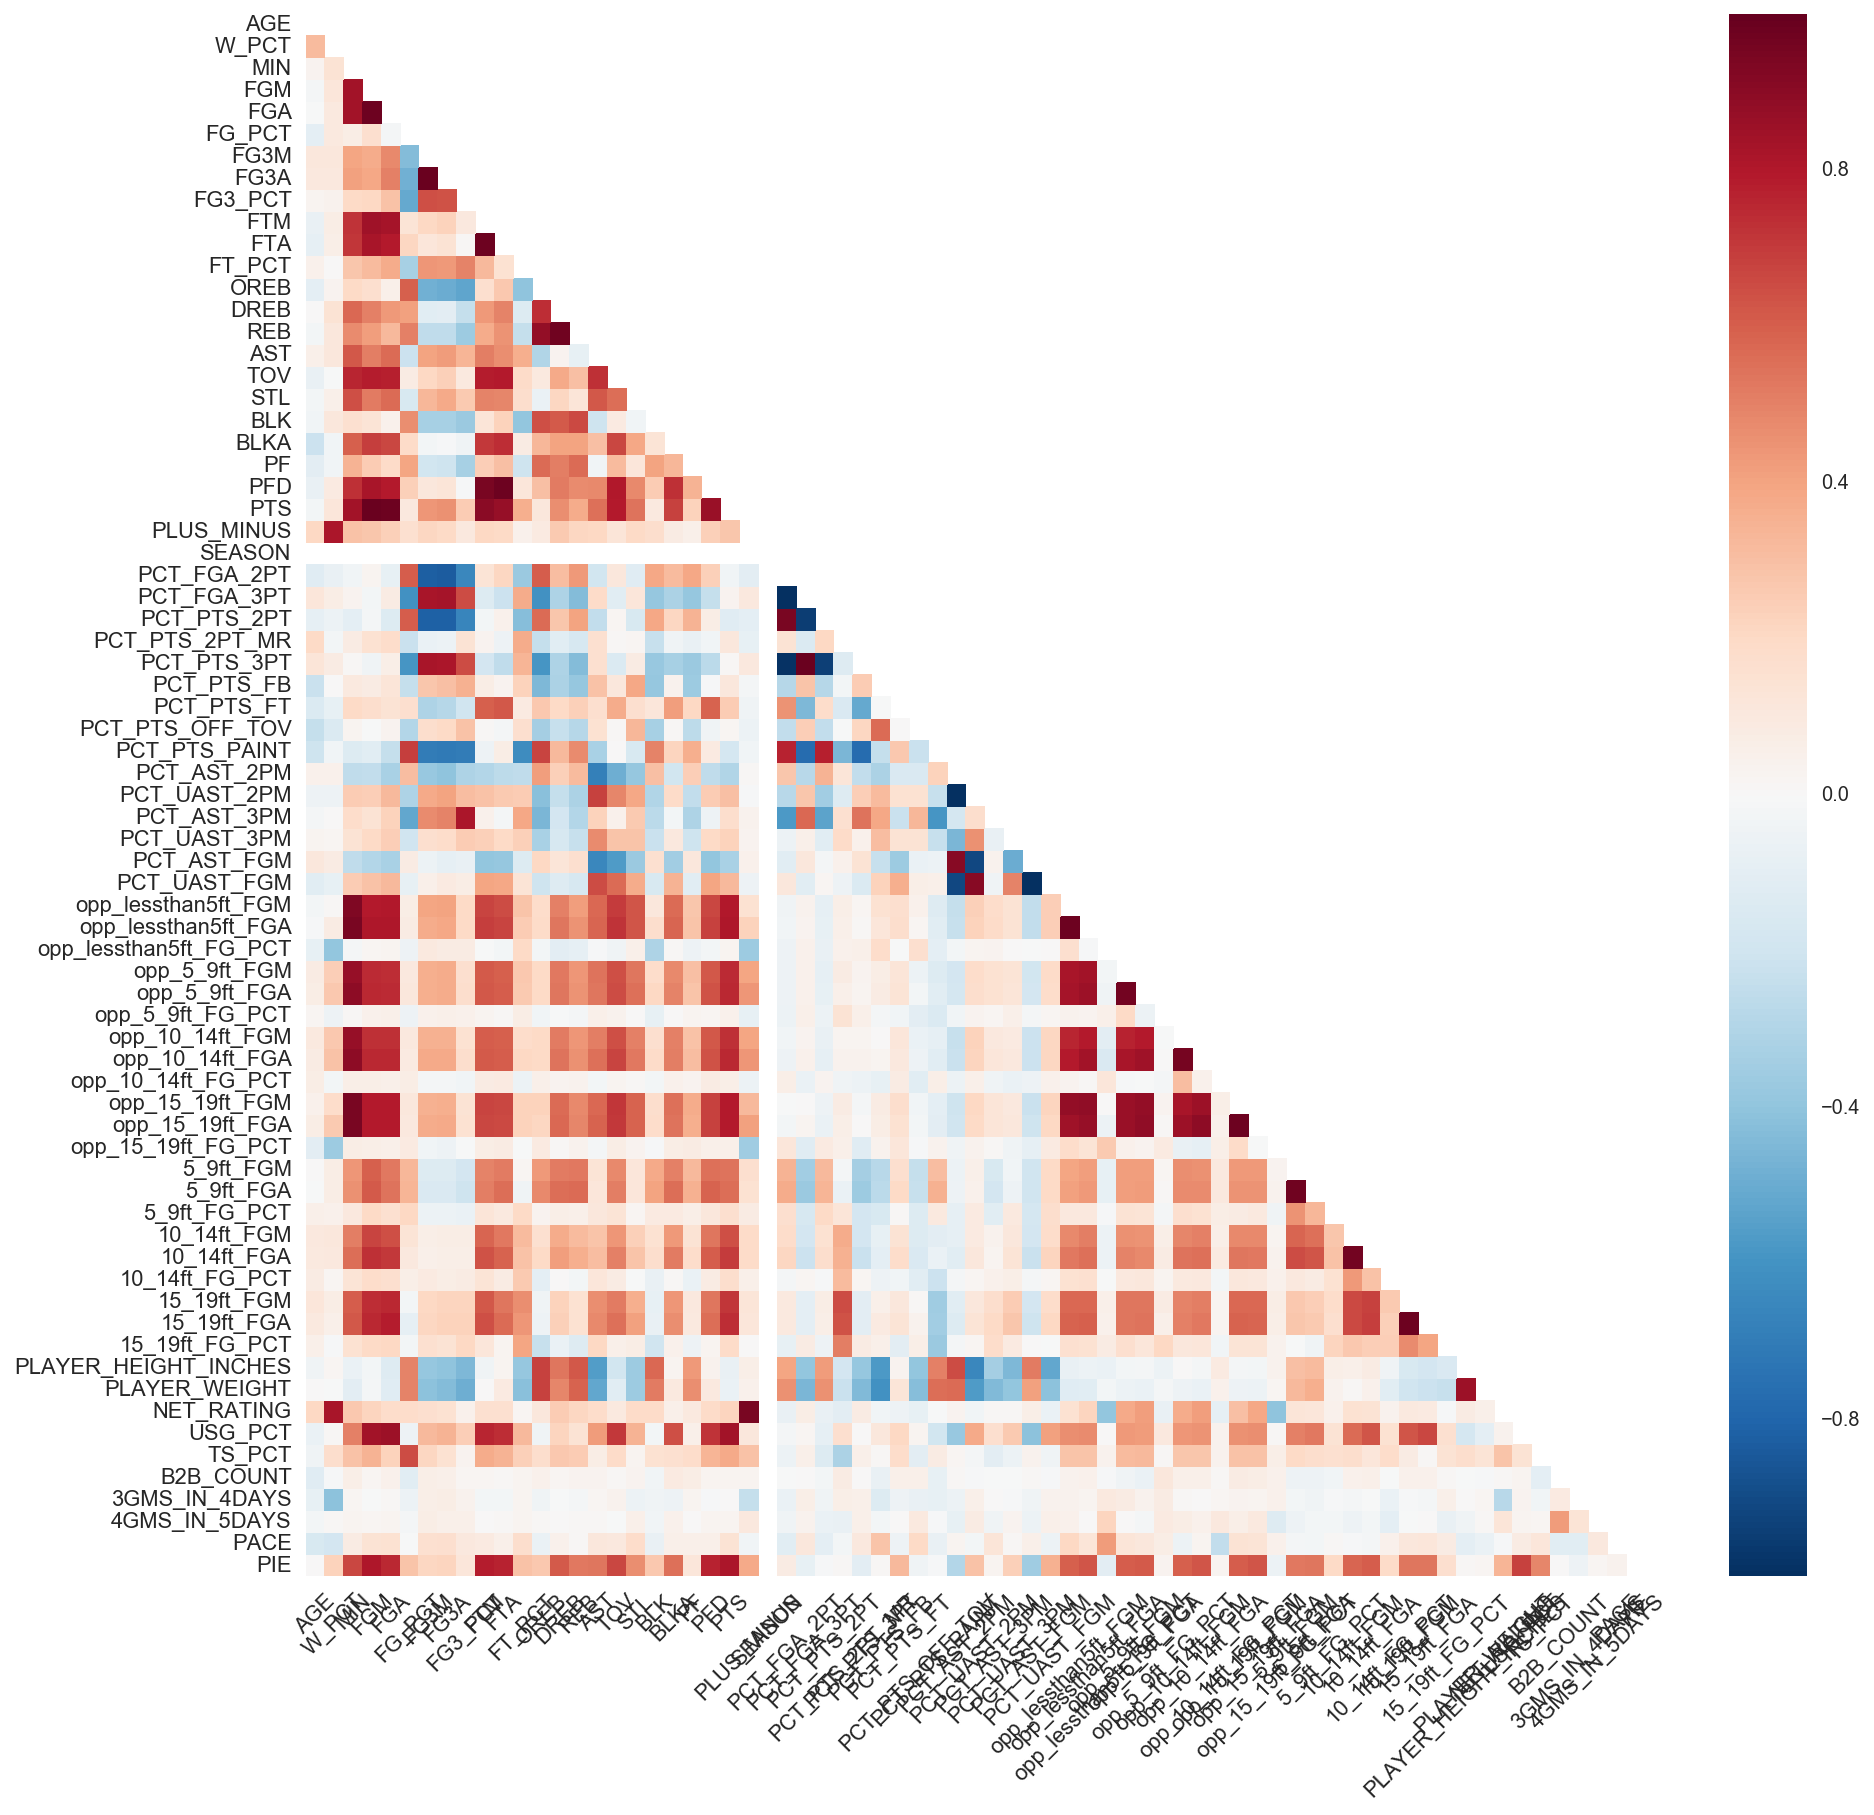

In [48]:
subj_corr = data.corr()

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(subj_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(15,14))

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(subj_corr, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=11, rotation=45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=11, rotation=0)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

In [49]:
from sklearn.decomposition import PCA

In [50]:
# to determine number of components
# by generating random numbers based on data.shape
def horn_parallel_analysis(shape, iters=1000, percentile=95):
    pca = PCA(n_components=shape[1])
    eigenvals = []
    for i in range(iters):
        rdata = np.random.normal(0,1,size=shape)
        pca.fit(rdata)
        eigenvals.append(pca.explained_variance_)
    eigenvals = np.array(eigenvals)
    return np.percentile(eigenvals, percentile, axis=0)

In [51]:
# generates r
data_pa = horn_parallel_analysis(data.shape, percentile=95)

In [52]:
# normalize
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data_n = ss.fit_transform(data)

In [53]:
# initialize and fit
data_pca = PCA()
data_pca.fit(data_n)

PCA(copy=True, n_components=None, whiten=False)

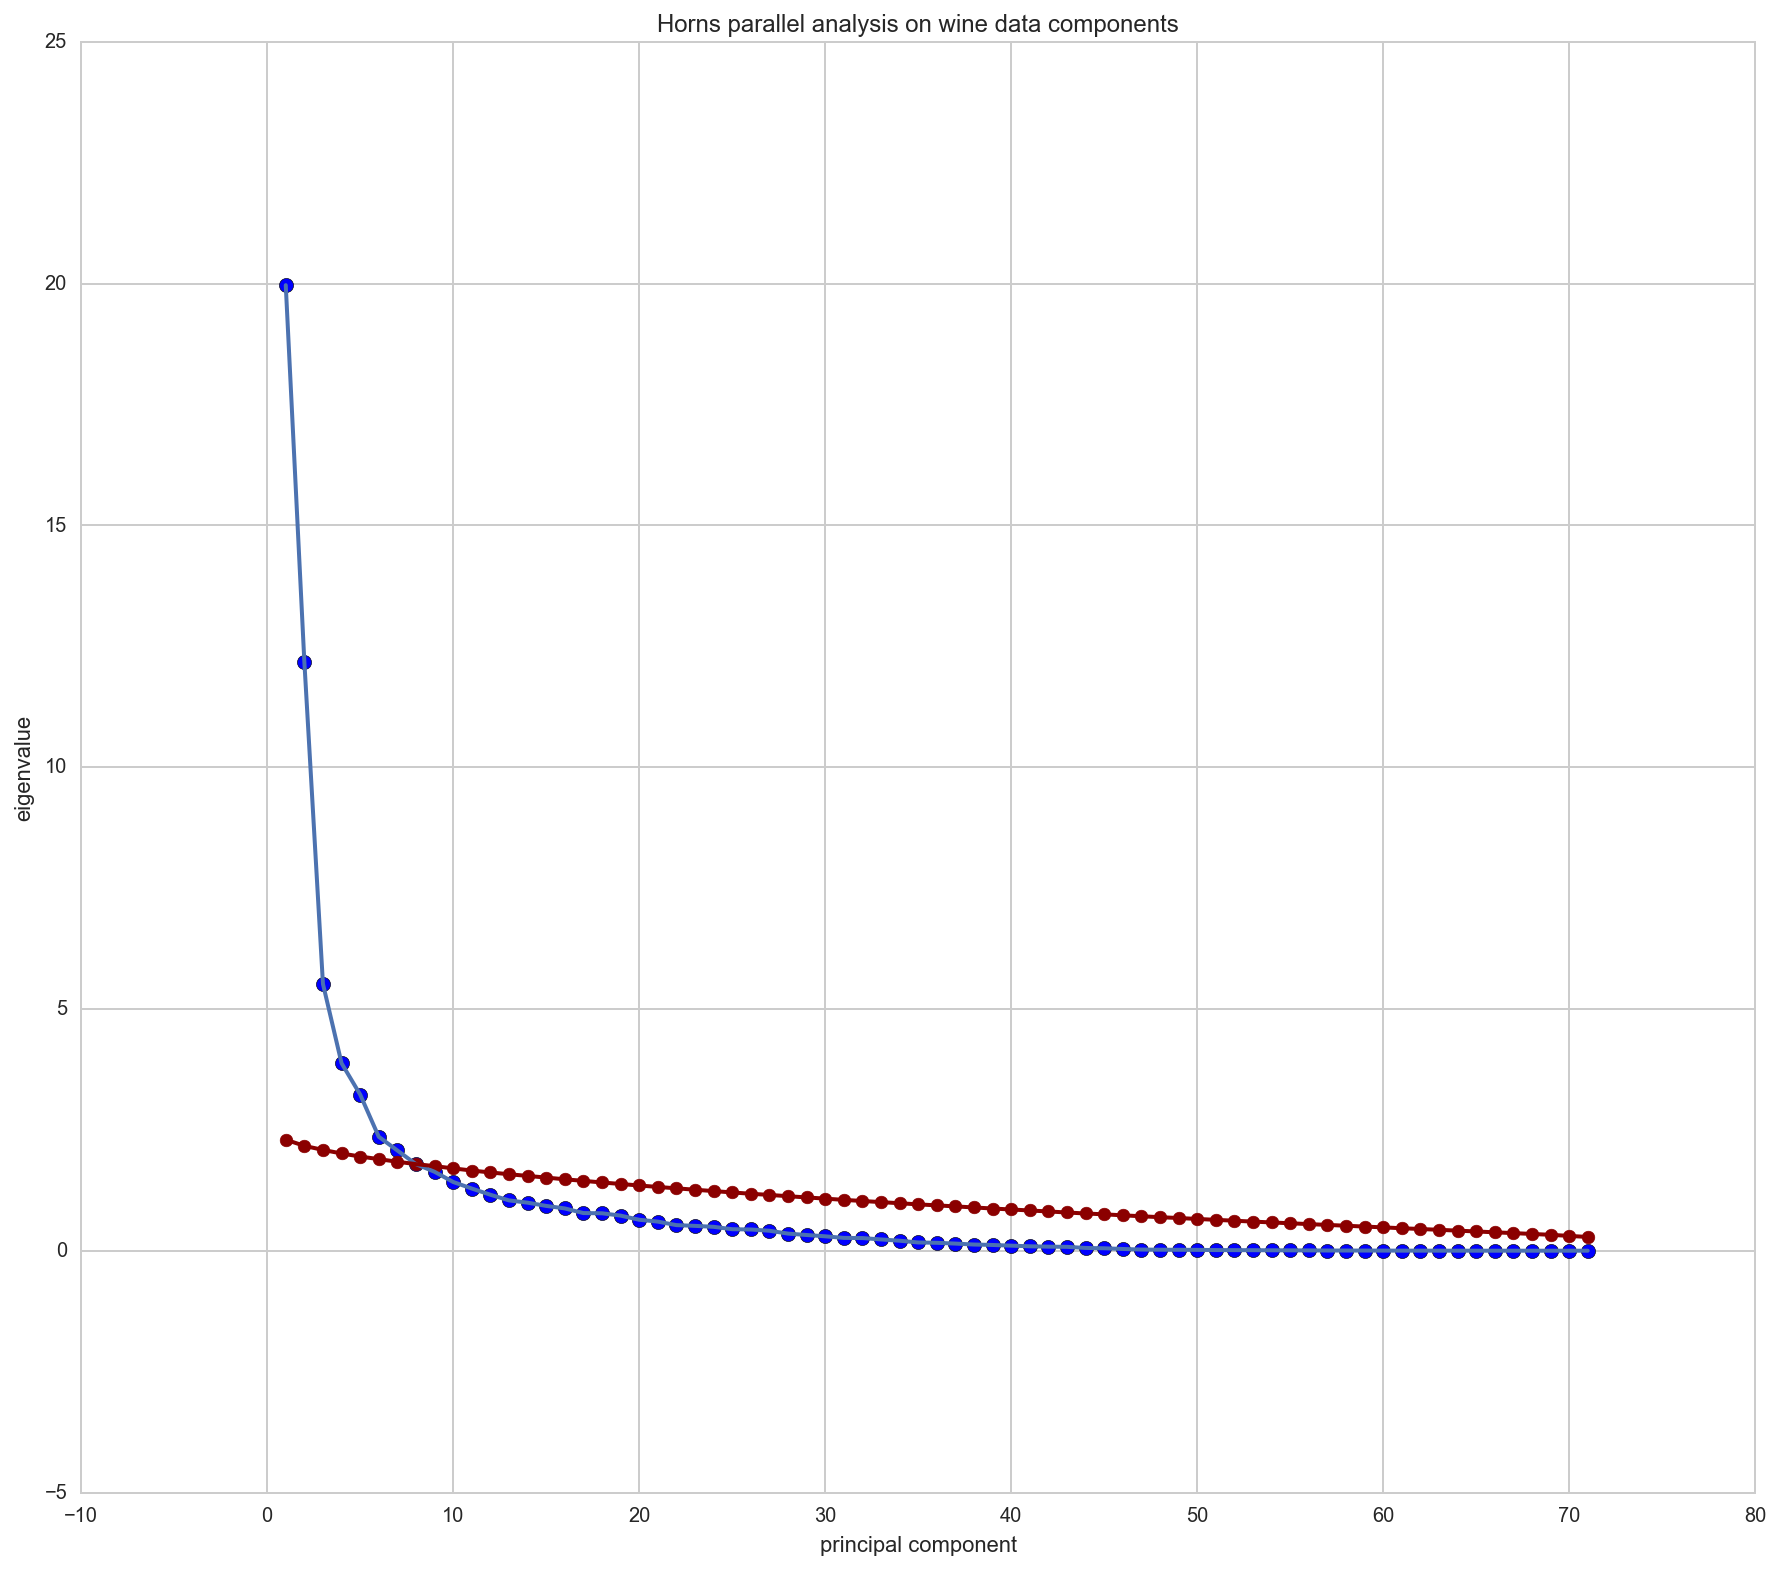

In [54]:
# Plot the wine eigenvalues (.variance_explained_) against the parallel analysis random eigenvalue cutoffs
# How many components are not noise, based on the chart?


fig, ax = plt.subplots(figsize=(15,13))

ax.plot(range(1, data.shape[1]+1), data_pca.explained_variance_, lw=2)
ax.scatter(range(1, data.shape[1]+1), data_pca.explained_variance_, s=50)

ax.plot(range(1, len(data_pa)+1), data_pa, lw=2, color='darkred')
ax.scatter(range(1, len(data_pa)+1), data_pa, s=40, color='darkred')


ax.set_title('Horns parallel analysis on wine data components')
ax.set_xlabel('principal component')
ax.set_ylabel('eigenvalue')
plt.show()

In [55]:
data_pca = PCA(n_components=7)
data_pca.fit(data_n)

PCA(copy=True, n_components=7, whiten=False)

In [56]:
# these are the weights or eigenvectors multipled to X to get your principal componen
data_components = data_pca.components_
print data_components

[[ -3.21122616e-03  -3.92760735e-02  -2.07163848e-01  -2.12239711e-01
   -2.10532995e-01  -2.60101812e-02  -7.90008709e-02  -8.26585100e-02
   -4.45851683e-02  -1.95277051e-01  -1.90191773e-01  -7.60409284e-02
   -4.00000723e-02  -1.21654541e-01  -1.00422822e-01  -1.46568167e-01
   -1.89285127e-01  -1.38807131e-01  -3.50586935e-02  -1.55437320e-01
   -6.48836329e-02  -1.92283416e-01  -2.13868403e-01  -7.56085563e-02
    0.00000000e+00  -8.70873671e-03   8.70873671e-03   1.03232658e-02
   -2.76859741e-02   1.43715984e-02  -1.99985220e-02  -6.70242644e-02
    2.83315492e-03   2.73397420e-02   7.89239846e-02  -7.89252534e-02
   -3.02970069e-02  -5.52769614e-02   8.99945684e-02  -8.99992524e-02
   -1.93605522e-01  -1.98240697e-01   6.19769240e-03  -1.87584689e-01
   -1.89312092e-01  -1.16903590e-02  -1.84900359e-01  -1.91183255e-01
   -1.52359669e-02  -1.97747920e-01  -1.98749550e-01  -1.18353510e-02
   -1.29058283e-01  -1.31055797e-01  -4.59987973e-02  -1.49257333e-01
   -1.61506195e-01  

In [57]:
print data.columns.values, '\n'
print '-------------------------------------\n'

for i, pc in enumerate(['PC1','PC2','PC3','PC4','PC5','PC6','PC7']):
    print pc
    for col, weight in zip(data.columns.values, data_components[i]):
        print col, weight
    print '-------------------------------------\n'
        

['AGE' 'W_PCT' 'MIN' 'FGM' 'FGA' 'FG_PCT' 'FG3M' 'FG3A' 'FG3_PCT' 'FTM'
 'FTA' 'FT_PCT' 'OREB' 'DREB' 'REB' 'AST' 'TOV' 'STL' 'BLK' 'BLKA' 'PF'
 'PFD' 'PTS' 'PLUS_MINUS' 'SEASON' 'PCT_FGA_2PT' 'PCT_FGA_3PT'
 'PCT_PTS_2PT' 'PCT_PTS_2PT_MR' 'PCT_PTS_3PT' 'PCT_PTS_FB' 'PCT_PTS_FT'
 'PCT_PTS_OFF_TOV' 'PCT_PTS_PAINT' 'PCT_AST_2PM' 'PCT_UAST_2PM'
 'PCT_AST_3PM' 'PCT_UAST_3PM' 'PCT_AST_FGM' 'PCT_UAST_FGM'
 'opp_lessthan5ft_FGM' 'opp_lessthan5ft_FGA' 'opp_lessthan5ft_FG_PCT'
 'opp_5_9ft_FGM' 'opp_5_9ft_FGA' 'opp_5_9ft_FG_PCT' 'opp_10_14ft_FGM'
 'opp_10_14ft_FGA' 'opp_10_14ft_FG_PCT' 'opp_15_19ft_FGM' 'opp_15_19ft_FGA'
 'opp_15_19ft_FG_PCT' '5_9ft_FGM' '5_9ft_FGA' '5_9ft_FG_PCT' '10_14ft_FGM'
 '10_14ft_FGA' '10_14ft_FG_PCT' '15_19ft_FGM' '15_19ft_FGA'
 '15_19ft_FG_PCT' 'PLAYER_HEIGHT_INCHES' 'PLAYER_WEIGHT' 'NET_RATING'
 'USG_PCT' 'TS_PCT' 'B2B_COUNT' '3GMS_IN_4DAYS' '4GMS_IN_5DAYS' 'PACE'
 'PIE'] 

-------------------------------------

PC1
AGE -0.00321122616495
W_PCT -0.0392760735229
MIN -0.2

In [58]:
print data_pca.explained_variance_ratio_
# pc1 explains 38% of variance

[ 0.2852298   0.17399295  0.07882161  0.05539144  0.04613887  0.0336645
  0.02961115]


In [59]:
print data_pca.explained_variance_
#eigenvalues.... above pc1.ratio = pc1.eigenvalues/total_eigenvalues

[ 19.96608613  12.1795067    5.51751253   3.87740059   3.22972056
   2.35651512   2.07278037]
